# Exercises week 35

## Deriving and Implementing Ordinary Least Squares

This week you will be deriving the analytical expressions for linear regression, building up the model from scratch. This will include taking several derivatives of products of vectors and matrices. Such derivatives are central to the optimization of many machine learning models. Although we will often use automatic differentiation in actual calculations, to be able to have analytical expressions is extremely helpful in case we have simpler derivatives as well as when we analyze various properties (like second derivatives) of the chosen cost functions.

Vectors are always written as boldfaced lower case letters and matrices as upper case boldfaced letters. You will find useful the notes from week 35 on derivatives of vectors and matrices. See also the textbook of Faisal at al, chapter 5 and in particular sections 5.3-5.5 at <https://github.com/CompPhysics/MachineLearning/blob/master/doc/Textbooks/MathMLbook.pdf>

### Learning goals

After completing these exercises, you will know how to
- Take the derivatives of simple products between vectors and matrices
- Implement OLS using the analytical expressions
- Create a feature matrix from a set of data
- Create a feature matrix for a polynomial model
- Evaluate the MSE score of various model on training and test data, and comparing their performance

### Deliverables

Complete the following exercises while working in a jupyter notebook. Then, in canvas, include
- The jupyter notebook with the exercises completed
- An exported PDF of the notebook (https://code.visualstudio.com/docs/datascience/jupyter-notebooks#_export-your-jupyter-notebook)

## How to take derivatives of Matrix-Vector expressions

In these exercises it is always useful to write out with summation indices the various quantities. Take also a look at the weekly slides from week 35 and the various examples included there.

As an example, consider the function

$$
f(\boldsymbol{x}) =\boldsymbol{A}\boldsymbol{x},
$$

which reads for a specific component $f_i$ (we define the matrix $\boldsymbol{A}$ to have dimension $n\times n$ and the vector $\boldsymbol{x}$ to have length $n$)

$$
f_i =\sum_{j=0}^{n-1}a_{ij}x_j,
$$

which leads to

$$
\frac{\partial f_i}{\partial x_j}= a_{ij},
$$

and written out in terms of the vector $\boldsymbol{x}$ we have

$$
\frac{\partial f(\boldsymbol{x})}{\partial \boldsymbol{x}}= \boldsymbol{A}.
$$

## Exercise 1 - Finding the derivative of Matrix-Vector expressions

**a)** Consider the expression

$$
\frac{\partial (\boldsymbol{a}^T\boldsymbol{x})}{\partial \boldsymbol{x}},
$$

Where $\boldsymbol{a}$ and $\boldsymbol{x}$ are column-vectors with length $n$.

What is the *shape* of the expression we are taking the derivative of?

What is the *shape* of the thing we are taking the derivative with respect to?

What is the *shape* of the result of the expression?

**b)** Show that

$$
\frac{\partial (\boldsymbol{a}^T\boldsymbol{x})}{\partial \boldsymbol{x}} = \boldsymbol{a}^T,
$$

**c)** Show that

$$
\frac{\partial (\boldsymbol{a}^T\boldsymbol{A}\boldsymbol{a})}{\partial \boldsymbol{a}} = \boldsymbol{a}^T(\boldsymbol{A}+\boldsymbol{A}^T),
$$

**Answers:**\
**1a)** 

Since both $\boldsymbol{a}$ and $\boldsymbol{x}$ are column vector with shape nx1 and we take the product of the two vectors, the product will be a 1x1 matrix.

We are taking the derivative with respect to the vector $\boldsymbol{x}$, which is an 1xn "matrix".

Since $(\boldsymbol{a} \cdot \boldsymbol{x})$ is a scalar that is differentiated with respect to $\boldsymbol{x}$. The resulting expression will have the shape 1xn. This can be seen when looking at the Jacobian matrix and considering the result when either $(\boldsymbol{a}$ or $\boldsymbol{x})$ is a scalar.

$$\mathbf{J} = \mathbf{\frac{\partial y}{\partial x}} = \begin{pmatrix}
\frac{\partial y_1}{\partial x_1} & \frac{\partial y_1}{\partial x_2} & \cdots & \frac{\partial y_1}{\partial x_n} \\
\frac{\partial y_2}{\partial x_1} & \frac{\partial y_2}{\partial x_2} & \cdots & \frac{\partial y_2}{\partial x_n} \\
\vdots & \vdots & \ddots & \vdots \\
\frac{\partial y_m}{\partial x_1} & \frac{\partial y_m}{\partial x_2} & \cdots & \frac{\partial y_m}{\partial x_n}
\end{pmatrix}$$

**1b)**\
As previously stated the product of $(\boldsymbol{a} \cdot \boldsymbol{x})$ is a scalar, a 1x1 matrix. If, instead of initialy taking the product, we keep the expression expanded. We see that $x_i$ dissapears out of the expression through the partal differentiation, leaving us with $\boldsymbol{a}^T$.

$$\frac{\partial (\boldsymbol{a}^T\boldsymbol{x})}{\partial \boldsymbol{x}} = 
\begin{pmatrix}
\frac{\partial (\boldsymbol{a_1} \cdot \boldsymbol{x_1})}{\partial x_1} & \frac{\partial (\boldsymbol{a_2} \cdot \boldsymbol{x_2})}{\partial x_2} & \dots & \frac{\partial (\boldsymbol{a_n} \cdot \boldsymbol{x_n})}{\partial x_n}
\end{pmatrix} = 
\begin{pmatrix} 
\boldsymbol{a_1} & \boldsymbol{a_2} & \dots \boldsymbol{a_n}
\end{pmatrix} = \boldsymbol{a}^T
$$

\
**1c)** 

Consider that the product of $(\boldsymbol{a}^T\boldsymbol{A}\boldsymbol{a})$ is a scalar. Since A is multiplied with elements from $a$ twice, once through the left multiplication and once through the right multiplication, when differentiating $(\boldsymbol{a}^T\boldsymbol{A}\boldsymbol{a})$ with respect to any element $a_i$ we get a contribution from both these elements. We can rewrite this scalar into: 

$$\frac{\partial}{\partial a_i}\left(\sum_{j=1}^{n} \sum_{k=1}^{n} a_j A_{jk} a_k\right) = \sum_{k=1}^{n} A_{ik} a_k + \sum_{j=1}^{n} a_j A_{ji}$$

The first sum gives us $\boldsymbol{a}^T$ times column $i$ of $\boldsymbol{A}^T$.
The second sum gives us $\boldsymbol{a}^T$ times column $i$ of $\boldsymbol{A}$.

This can be further expanded into $\boldsymbol{a}^T(\boldsymbol{A}^T+\boldsymbol{A})$ through standard matrix/vector addition, showing that:

$$\frac{\partial (\boldsymbol{a}^T\boldsymbol{A}\boldsymbol{a})}{\partial \boldsymbol{a}} = \boldsymbol{a}^T(\boldsymbol{A}^T + \boldsymbol{A})$$




## Exercise 2 - Deriving the expression for OLS

The ordinary least squares method finds the parameters $\boldsymbol{\theta}$ which minimizes the squared error between our model $\boldsymbol{X\theta}$ and the true values $\boldsymbol{y}$.

To find the parameters $\boldsymbol{\theta}$ which minimizes this error, we take the derivative of the squared error expression with respect to $\boldsymbol{\theta}$, and set it equal to 0.

**a)** Very briefly explain why the approach above finds the parameters $\boldsymbol{\theta}$ which minimizes this error.

We typically write the squared error as

$$
\vert\vert\boldsymbol{y} - \boldsymbol{X\theta}\vert\vert^2
$$

which we can rewrite in matrix-vector form as

$$
\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\theta}\right)^T\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\theta}\right)
$$

**b)** If $\boldsymbol{X}$ is invertible, what is the expression for the optimal parameters $\boldsymbol{\theta}$? (**Hint:** Don't compute any derivatives, but solve $\boldsymbol{X\theta}=\boldsymbol{y}$ for $\boldsymbol{\theta}$)

**c)** Show that

$$
\frac{\partial \left(\boldsymbol{x}-\boldsymbol{A}\boldsymbol{s}\right)^T\left(\boldsymbol{x}-\boldsymbol{A}\boldsymbol{s}\right)}{\partial \boldsymbol{s}} = -2\left(\boldsymbol{x}-\boldsymbol{A}\boldsymbol{s}\right)^T\boldsymbol{A},
$$

**d)** Using the expression from **c)**, but substituting back in $\boldsymbol{\theta}$, $\boldsymbol{y}$ and $\boldsymbol{X}$, find the expression for the optimal parameters $\boldsymbol{\theta}$ in the case that $\boldsymbol{X}$ is not invertible, but $\boldsymbol{X^T X}$ is, which is most often the case.

$$
\boldsymbol{\hat{\theta}_{OLS}} = ...
$$

**Answers:**\
**2a)**

In essence, partial derivation of an expression with respect to a given parameter gives us the gradient of that expression with respect to that parameter. Setting the gradient equal to zero lets us find the point where the given gradient is zero, or in other words; the maximum of minimum point of the expression. Given that the expression is convex, setting the gradient to zero will give us the minimum.\


**2b)**

Given that $X$ is invertible we can multiply both sides with the inverted, $X^{-1}$. This simplifies the left side to $X^{-1} X \theta = \theta$, giving us $$\theta = y X^{-1}$$

**2c)**

To show that

$$
\frac{\partial \left(\boldsymbol{x}-\boldsymbol{A}\boldsymbol{s}\right)^T\left(\boldsymbol{x}-\boldsymbol{A}\boldsymbol{s}\right)}{\partial \boldsymbol{s}} = -2\left(\boldsymbol{x}-\boldsymbol{A}\boldsymbol{s}\right)^T\boldsymbol{A},
$$

we first set $(x-As) = k$. This gives us $\frac{\partial k^T k}{\partial s}$. Empolying the chain rule we get that $\frac{\partial k^T k}{\partial s} = \frac{\partial (k^T k)}{\partial k} \cdot \frac{\partial k}{\partial s}$. We know that $\frac{\partial (k^T k)}{\partial k} = 2k^T$, and by substituting back in $k = (x - As)$ into $\frac{\partial k}{\partial s}$ and performing the partial differentiation we get $\frac{\partial k}{\partial s} = -A$.

Substituting both these expressions back into the initial chain rule expression, we get 

$$\frac{\partial \left(\boldsymbol{x}-\boldsymbol{A}\boldsymbol{s}\right)^T\left(\boldsymbol{x}-\boldsymbol{A}\boldsymbol{s}\right)}{\partial \boldsymbol{s}} = \frac{\partial k^T k}{\partial s} = \frac{\partial (k^T k)}{\partial k} \cdot \frac{\partial k}{\partial s} = 2k^T \cdot -A = -2(x - As)^T A$$


**2d**

Substituting back in $\theta, y \text{ and } X$ into the expression from c) we get

$$\frac{\partial (y-X\theta)^T (y-X\theta)}{\partial \theta} = -2 (y - X \theta)^T X$$

By setting the gradient equal to zero, $-2 (y - X \theta)^T X$ = 0, we can find the optimal parameters $\theta$. Expanding and manipulating this expression we find that $$\hat{\theta}_{OLS} = (X^T X)^{-1} X^T y$$

## Exercise 3 - Creating feature matrix and implementing OLS using the analytical expression

With the expression for $\boldsymbol{\hat{\theta}_{OLS}}$, you now have what you need to implement OLS regression with your input data and target data $\boldsymbol{y}$. But before you can do that, you need to set up you input data as a feature matrix $\boldsymbol{X}$.

In a feature matrix, each row is a datapoint and each column is a feature of that data. If you want to predict someones spending based on their income and number of children, for instance, you would create a row for each person in your dataset, with the montly income and the number of children as columns.

We typically also include an intercept in our models. The intercept is a value that is added to our prediction regardless of the value of the other features. The intercept tries to account for constant effects in our data that are not dependant on anything else. In our current example, the intercept could account for living expenses which are typical regardless of income or childcare expenses.

We calculate the optimal intercept by including a feature with the constant value of 1 in our model, which is then multplied by some parameter $\theta_0$ from the OLS method into the optimal intercept value (which will be $\theta_0$). In practice, we include the intercept in our model by adding a column of ones to the start of our feature matrix.

In [48]:
import numpy as np

In [49]:
n = 20
income = np.array([116., 161., 167., 118., 172., 163., 179., 173., 162., 116., 101., 176., 178., 172., 143., 135., 160., 101., 149., 125.])
children = np.array([5, 3, 0, 4, 5, 3, 0, 4, 4, 3, 3, 5, 1, 0, 2, 3, 2, 1, 5, 4])
spending = np.array([152., 141., 102., 136., 161., 129.,  99., 159., 160., 107.,  98., 164., 121.,  93., 112., 127., 117.,  69., 156., 131.])


**a)** Create a feature matrix $\boldsymbol{X}$ for the features income and children, including an intercept column of ones at the start.

In [50]:
# Creating a feature matrix based on income and number of children
X = np.zeros((n, 3))
X[:, 0] = 1
X[:, 1] = income
X[:, 2] = children**2


**b)** Use the expression from **3d)** to find the optimal parameters $\boldsymbol{\hat{\beta}_{OLS}}$ for predicting spending based on these features. Create a function for this operation, as you are going to need to use it a lot.

In [51]:
def OLS_parameters(X, y):

    theta = (np.linalg.inv(X.T @ X) @ X.T ) @ y

    return theta

## Exercise 4 - Fitting a polynomial

In this course, we typically do linear regression using polynomials, though in real world applications it is also very common to make linear models based on measured features like you did in the previous exercise.

When fitting a polynomial with linear regression, we make each polynomial degree($x, x^2, x^3, ..., x^p$) its own feature.

In [117]:
n = 50
x = np.linspace(-3, 3, n)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2) + np.random.normal(0, 0.1)

print(x)

[-3.         -2.87755102 -2.75510204 -2.63265306 -2.51020408 -2.3877551
 -2.26530612 -2.14285714 -2.02040816 -1.89795918 -1.7755102  -1.65306122
 -1.53061224 -1.40816327 -1.28571429 -1.16326531 -1.04081633 -0.91836735
 -0.79591837 -0.67346939 -0.55102041 -0.42857143 -0.30612245 -0.18367347
 -0.06122449  0.06122449  0.18367347  0.30612245  0.42857143  0.55102041
  0.67346939  0.79591837  0.91836735  1.04081633  1.16326531  1.28571429
  1.40816327  1.53061224  1.65306122  1.7755102   1.89795918  2.02040816
  2.14285714  2.26530612  2.3877551   2.51020408  2.63265306  2.75510204
  2.87755102  3.        ]


**a)** Create a feature matrix $\boldsymbol{X}$ for the features $x, x^2, x^3, x^4, x^5$, including an intercept column of ones at the start. Make this into a function, as you will do this a lot over the next weeks.

In [53]:
def polynomial_features(x, p):
    n = len(x)
    X = np.zeros((n, p + 1))
    
    for k in range(0, p + 1):
        X[:, k] = x**k

    return X

X = polynomial_features(x, 5)

**b)** Use the expression from **3d)** to find the optimal parameters $\boldsymbol{\hat{\beta}_{OLS}}$ for predicting $\boldsymbol{y}$ based on these features. If you have done everything right so far, this code will not need changing.

In [54]:
beta = OLS_parameters(X, y)

**c)** Like in exercise 4 last week, split your feature matrix and target data into a training split and test split.

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

**d)** Train your model on the training data(find the parameters which best fit) and compute the MSE on both the training and test data.

In [56]:
# MSE function from lecture notes:

def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n

In [57]:
# Calculating beta (theta) for the training data
beta = OLS_parameters(X_train, y_train)

# Finding ytilde based on the training features and beta
ytilde = X_train @ beta

# Calculating training MSE
MES_train = MSE(y_train, ytilde)
print("Training mean squared error", MES_train)

# Calculating test MSE
ypredict = X_test @ beta
MES_test = MSE(y_test, ypredict)
print("Training mean squared error", MES_test)



Training mean squared error 0.014306257124603872
Training mean squared error 0.01786220984580223


**e)** Do the same for each polynomial degree from 2 to 10, and plot the MSE on both the training and test data as a function of polynomial degree. The aim is to reproduce Figure 2.11 of [Hastie et al](https://github.com/CompPhysics/MLErasmus/blob/master/doc/Textbooks/elementsstat.pdf). Feel free to read the discussions leading to figure 2.11 of Hastie et al. 

Degree 1: Train MSE = 0.076918, Test MSE = 0.067473
Degree 2: Train MSE = 0.054870, Test MSE = 0.050321
Degree 3: Train MSE = 0.026628, Test MSE = 0.043491
Degree 4: Train MSE = 0.026385, Test MSE = 0.042515
Degree 5: Train MSE = 0.018420, Test MSE = 0.029872
Degree 6: Train MSE = 0.014459, Test MSE = 0.018170
Degree 7: Train MSE = 0.009423, Test MSE = 0.015224
Degree 8: Train MSE = 0.005064, Test MSE = 0.010729
Degree 9: Train MSE = 0.005006, Test MSE = 0.011276
Degree 10: Train MSE = 0.004122, Test MSE = 0.009388
Degree 11: Train MSE = 0.003768, Test MSE = 0.007627
Degree 12: Train MSE = 0.003766, Test MSE = 0.007793
Degree 13: Train MSE = 0.002921, Test MSE = 0.018925
Degree 14: Train MSE = 0.002908, Test MSE = 0.017106
Degree 15: Train MSE = 0.002426, Test MSE = 0.033522
Degree 16: Train MSE = 0.002377, Test MSE = 0.026936
Degree 17: Train MSE = 0.002348, Test MSE = 0.022039
Degree 18: Train MSE = 0.002208, Test MSE = 0.045381
Degree 19: Train MSE = 0.002099, Test MSE = 0.121839


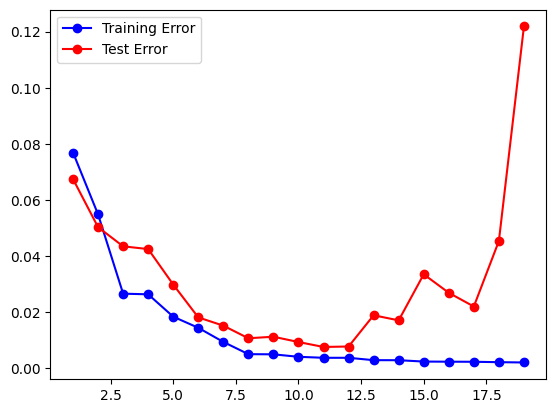

In [ ]:
import matplotlib.pyplot as plt

# Generate the data
n = 50
x = np.linspace(-3, 3, n)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2) + np.random.normal(0, 0.1, n)

# Task 4e: MSE vs polynomial degree
degrees = range(1, 20)  # 1 to 10 as requested
MSE_train = []
MSE_test = []

# Split the data before creating the design matrices to make sure all iterations use the same test and training dataset
x_train, x_test, y_train, y_test = train_test_split(x, y)

# Iterating over all degrees
for degree in degrees:   
    
    # Create a design matrix for current polynomial degree
    X_train = polynomial_features(x_train, degree)
    X_test = polynomial_features(x_test, degree)
    
    # Train the model (find optimal parameters)
    beta = OLS_parameters(X_train, y_train)
    
    # Make predictions
    y_train_pred = X_train @ beta
    y_test_pred = X_test @ beta
    
    # Calculate MSE for both training and test data
    train_mse_current = MSE(y_train, y_train_pred)
    test_mse_current = MSE(y_test, y_test_pred)
    
    # Store results
    MSE_train.append(train_mse_current)
    MSE_test.append(test_mse_current)
    
    # Print results
    print(f"Degree {degree}: Train MSE = {train_mse_current:.6f}, Test MSE = {test_mse_current:.6f}")

plt.plot(degrees, MSE_train, 'o-', color='blue', label='Training Error')
plt.plot(degrees, MSE_test, 'o-', color='red', label='Test Error')
plt.legend()

**f)** Interpret the graph. Why do the lines move as they do? What does it tell us about model performance and generalizability?

**Answer:**\
**4f)**

While the graph varies between runs because of the semi-random nature of data generation and test/train splitting, the general takeaway is that the MSE of the test data, as compared to the MSE of the training data, first decreses, then increases as a function of polynomial degree. This tells us that a more complex model won't always give us a better prediction. More general, we can say that there exists a point, a "sweet spot", where we will get the optimal performance from a model depending on the input data and model complexity.

## Exercise 5 - Comparing your code with sklearn

When implementing different algorithms for the first time, it can be helpful to double check your results with established implementations before you go on to add more complexity.

**a)** Make sure your `polynomial_features` function creates the same feature matrix as sklearns PolynomialFeatures.

(https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Reenerate the data
n = 50
x = np.linspace(-3, 3, n)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2) + np.random.normal(0, 0.1, n)

# Creating polynomial features using the Sklean function
sklearn_poly = PolynomialFeatures(2).fit_transform(x.reshape(-1, 1))

# Creating polynomial features using our custom function
custom_poly = polynomial_features(x, 2)

# Checking that they are the same by subtracting each element with its counterpart. If all elements are zero, the functions give the same result 
print(custom_poly - sklearn_poly)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


**b)** Make sure your `OLS_parameters` function computes the same parameters as sklearns LinearRegression with fit_intercept set to False, since the intercept is included in the feature matrix. Use `your_model_object.coef_` to extract the computed parameters.

(https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [154]:
from sklearn.linear_model import LinearRegression

custom_theta = OLS_parameters(custom_poly, y)
print(custom_theta)

sklearn_theta = LinearRegression(fit_intercept=False).fit(sklearn_poly, y).coef_
print(sklearn_theta)


[ 0.83346088  0.24485438 -0.04677353]
[ 0.83346088  0.24485438 -0.04677353]
